# One Compartmental IV PK Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.signal import find_peaks

## PK Parameters

In [79]:
# infusion rate adjusted by changing Dose and inf_duration
Dose = 10 # mg
Vd = 50 # L
Cl = 20 # L/h
tau = 6 # h
inf_duration = 0.001 # h (minimum 0.001)

## Max Time

In [72]:
max_t = 24 # h

## Model

In [73]:
# zero order infusion: constant rate
def infuse(t):
    if t % tau <= inf_duration:
        return Dose / inf_duration
    else:
        return 0

def model(C, t):
    dCdt = infuse(t) - Cl / Vd * C
    return dCdt

In [77]:
t = np.linspace(0, max_t, 100000) # from 0 to max_t hours with 100000 intervals
C = odeint(model, 0, t, tcrit=t) # differential equation, inital conc, time, special attention around t

## Plot: Concentration versus Time

Text(0.5, 1.0, 'Concentration vs Time')

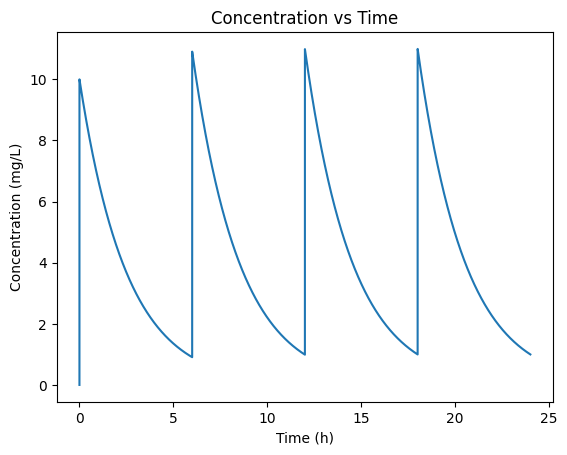

In [75]:
plt.plot(t, C)
plt.ylabel('Concentration (mg/L)')
plt.xlabel('Time (h)')
plt.title('Concentration vs Time')

## Derived Parameters: $C_{max}$, $C_{ss}$, $T_{max}$

In [78]:
peaks = find_peaks(C[:, 0])[0]

# Css: defined as the concentration after 5 half lives

# Cmax
for index, peak in enumerate(peaks):
    print(f'Dose {index + 1} Cmax Tmax {C[peak, 0]} mg/L {t[peak]} h')

Dose 1 Cmax Tmax 9.997200609408312 mg/L 0.001200012000120001 h
Dose 2 Cmax Tmax 10.904910788001871 mg/L 6.001020010200102 h
Dose 3 Cmax Tmax 10.986927677950344 mg/L 12.001080010800107 h
Dose 4 Cmax Tmax 10.994127757555587 mg/L 18.001140011400114 h


## Derived Parameters: $C_{min}$, $T_{min}$

In [62]:
troughs = find_peaks(-C[:, 0])[0]

for index, trough in enumerate(troughs):
    print(f'Dose {index + 1} Cmin Tmin {C[trough, 0]} mg/L {t[trough]} h')

Dose 1 Cmin Tmin 0.9074263440347087 mg/L 5.999819998199982 h
Dose 2 Cmin Tmin 0.989722402534121 mg/L 11.999879998799988 h
Dose 3 Cmin Tmin 0.9971662005574878 mg/L 17.999939999399995 h


## Derived Parameter: $AUC$

In [66]:
AUC = np.trapz(C[:, 0], t) # composite trapzodial
print(f'AUC {AUC} mgh/L')

AUC 97.5054336647531 mgh/L
